In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

from utils.visualization import *

In [8]:
def create_center_mask(image, tongue_mask):
    height, width = image.shape[:2]
    mask = np.zeros((height, width), dtype=np.uint8)
    
    # Find the contour of the tongue
    contours, _ = cv2.findContours(tongue_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        tongue_contour = max(contours, key=cv2.contourArea)
        
        # Create a slightly smaller contour to focus on the edges
        epsilon = 0.02 * cv2.arcLength(tongue_contour, True)
        smaller_contour = cv2.approxPolyDP(tongue_contour, epsilon, True)
        
        # Draw the smaller contour on the mask
        cv2.drawContours(mask, [smaller_contour], 0, 255, thickness=int(width * 0.15))
        mask = cv2.bitwise_not(mask)
        mask = cv2.bitwise_and(mask, tongue_mask)
    
    return mask

In [21]:
def extract_center(image_path, image):
    _, tongue_mask = cv2.threshold(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), 1, 255, cv2.THRESH_BINARY)
    edge_mask = create_center_mask(image, tongue_mask)

    # Apply the edge mask to the original image
    masked_image = cv2.bitwise_and(image, image, mask=edge_mask)
    vis_path = 'Data/extracted_coating/test_visualization_center_' + image_path
    cv2.imwrite(vis_path, masked_image)

    return masked_image

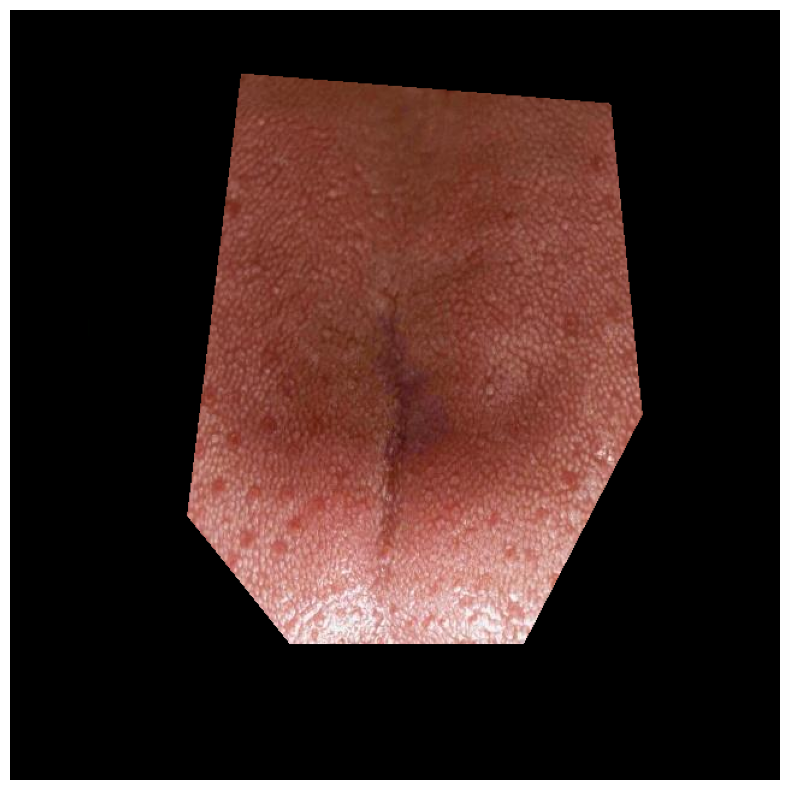

In [26]:
image = cv2.imread('Data/to_extract/validation_00099.jpg')
result = extract_center('validation_00099.jpg', image)
rgb_image = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.imshow(rgb_image)
plt.axis('off')
plt.show()


In [27]:
image_path = 'Data/to_extract'
images = os.listdir(image_path)
for image_file in images:
    image_path = 'Data/to_extract'
    if image_file.lower().endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(image_path, image_file)
        image = cv2.imread(image_path)
        if image is None:
            print(f"Error: Unable to read image at {image_path}")
            continue
        
        extract_center(image_file, image)